# **Importing necessary libraries for EDA and building the CNN model for multi-class image classification**

In [ ]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import seaborn as sns
from keras.models import load_model

In [ ]:
print(tf.__version__)

2.14.0


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Dataset_spines

/content/gdrive/MyDrive/Colab Notebooks/Dataset_spines


In [ ]:
!ls

filopodia  mushroom  stubby  thin


In [ ]:
np.random.seed(101)

#### **Installing split-folders package (one-time) to create train and val folders for the respective classes**

In [ ]:
# !pip install split-folders

In [ ]:
# input_folder_path = '/content/gdrive/MyDrive/Colab Notebooks/Dataset_spines'
# output_folder_path = '/content/gdrive/MyDrive/Colab Notebooks/Spine_Dataset'

#### **Creating the train and val set from the input data**

In [ ]:
# import splitfolders

# splitfolders.ratio(input_folder_path, output=output_folder_path,
#     seed=1337, ratio=(.8, .2), group_prefix=None, move=False)

In [ ]:
%cd '/content/gdrive/MyDrive/Colab Notebooks/Spine_Dataset'

/content/gdrive/MyDrive/Colab Notebooks/Spine_Dataset


In [ ]:
!pwd

/content/gdrive/MyDrive/Colab Notebooks/Spine_Dataset


In [ ]:
!ls

3.png  filopodiaimage004.png  train  val


### **Exploring the no. of directories, no. of classes and no. of images per class**

In [ ]:
for dirpath, dirnames, filenames in os.walk('/content/gdrive/MyDrive/Colab Notebooks/Spine_Dataset'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {len(dirpath)}.')

There are 2 directories and 2 images in 53.
There are 4 directories and 0 images in 59.
There are 0 directories and 90 images in 66.
There are 0 directories and 40 images in 69.
There are 0 directories and 229 images in 68.
There are 0 directories and 84 images in 64.
There are 4 directories and 0 images in 57.
There are 0 directories and 23 images in 64.
There are 0 directories and 10 images in 67.
There are 0 directories and 58 images in 66.
There are 0 directories and 21 images in 62.


### **Getting the class names programatically**

In [ ]:
import pathlib
data_dir = pathlib.Path('/content/gdrive/MyDrive/Colab Notebooks/Spine_Dataset/train')


#Create a list of class names from the subdirectory
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['filopodia' 'mushroom' 'stubby' 'thin']


## **Visualizing the Images**

In [ ]:
## Using helper function to view random images

import random

def view_random_image(target_dir, target_class):

  #Setting up the target directory(we'll view images from here)
  target_folder = target_dir + target_class

  # Getting a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Reading image and displaying using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img, cmap='gray')
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}') # Showing the size of image

  return img

['filopodiaimage029.png']
Image shape: (692, 1177, 4)


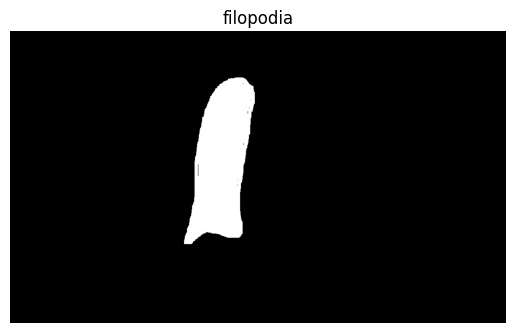

In [ ]:
# Viewing random Filopodia spine image

target_directory_for_images = '/content/gdrive/MyDrive/Colab Notebooks/Spine_Dataset/train/'
target_class_of_image = 'filopodia'

img_class1 = view_random_image(target_dir = target_directory_for_images,
                        target_class = target_class_of_image)

['52.png']
Image shape: (250, 250)


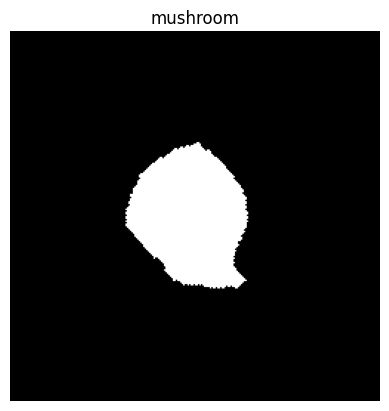

In [ ]:
# Viewing random Mushroom spine image

target_directory_for_images = '/content/gdrive/MyDrive/Colab Notebooks/Spine_Dataset/train/'
target_class_of_image = 'mushroom'

img_class2 = view_random_image(target_dir = target_directory_for_images,
                        target_class = target_class_of_image)

['281.png']
Image shape: (250, 250)


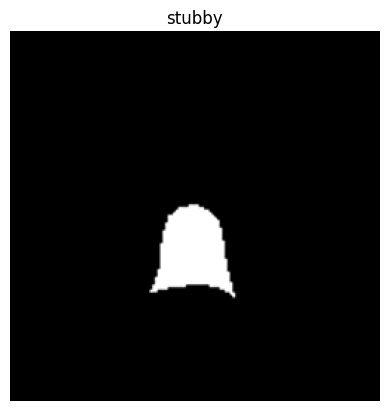

In [ ]:
# Viewing random Stubby spine image

target_directory_for_images = '/content/gdrive/MyDrive/Colab Notebooks/Spine_Dataset/train/'
target_class_of_image = 'stubby'

img_class3 = view_random_image(target_dir = target_directory_for_images,
                        target_class = target_class_of_image)

['414.png']
Image shape: (250, 250)


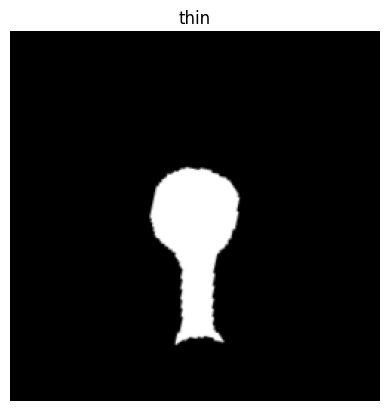

In [ ]:
# Viewing random Thin spine image

target_directory_for_images = '/content/gdrive/MyDrive/Colab Notebooks/Spine_Dataset/train/'
target_class_of_image = 'thin'

img_class4 = view_random_image(target_dir = target_directory_for_images,
                        target_class = target_class_of_image)

In [ ]:
img_class1.shape, img_class2.shape, img_class3.shape, img_class4.shape,

((692, 1177, 4), (250, 250), (250, 250), (250, 250))

### **Normalizing our data according to the mean dimension of the images present in the training folder**

In [ ]:
## Setting training, validation and testing directories

train_path = '/content/gdrive/MyDrive/Colab Notebooks/Spine_Dataset/train/'
val_path = '/content/gdrive/MyDrive/Colab Notebooks/Spine_Dataset/val/'

In [ ]:
class_names,class_names[0], type(class_names[0])

(array(['filopodia', 'mushroom', 'stubby', 'thin'], dtype='<U9'),
 'filopodia',
 numpy.str_)

#### **Getting the mean dimension of the images to rescale them**

In [ ]:
dim1 = []
dim2 = []
for image_filename in os.listdir(train_path+class_names[2]):

    if(image_filename.split('.')[1] == 'png'):
      img = mpimg.imread(train_path+class_names[2] +'/'+image_filename)
      d1,d2 = img.shape
      dim1.append(d1)
      dim2.append(d2)


np.mean(dim1),np.mean(dim2)

(250.0, 250.0)

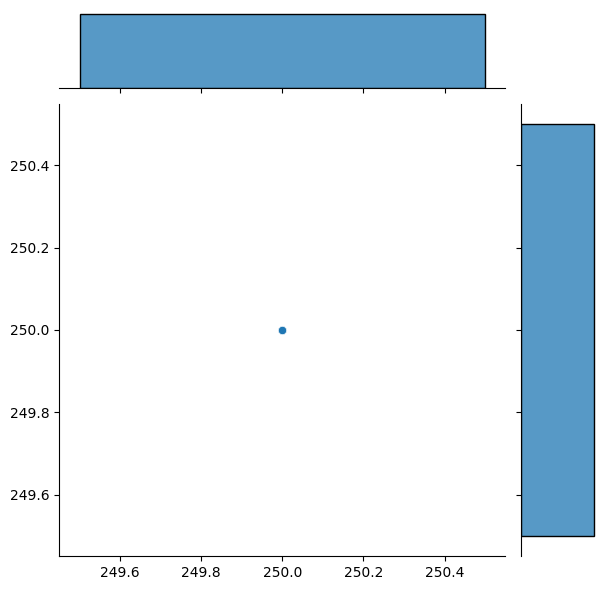

In [ ]:
# Visualizing the mean dimension for all the images in the train set

sns.jointplot(x=dim1, y=dim2)

## **Augmenting images and compiling the model**

In [ ]:
import tensorflow
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization ,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_size = (250,250)

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.10, # Shift the pic width by a max of 5%
    height_shift_range=0.10, # Shift the pic height by a max of 5%
    rescale=1/255, # Rescale the image by normalzing it.
    shear_range=0.1, # Shear means cutting away part of the image (max 10%)
    zoom_range=0.1, # Zoom in by 10% max
    horizontal_flip=True, # Allow horizontal flipping
    fill_mode='nearest' # Fill in missing pixels with the nearest filled value
)

train_gen = datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical'
)

validation_gen = datagen.flow_from_directory(
    val_path,
    target_size=image_size,
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=False,
)

Found 443 images belonging to 4 classes.
Found 112 images belonging to 4 classes.


#### **Labels for the classes (Which class indicates which index)**

In [ ]:
train_gen.class_indices

{'filopodia': 0, 'mushroom': 1, 'stubby': 2, 'thin': 3}

In [ ]:
validation_gen.class_indices

{'filopodia': 0, 'mushroom': 1, 'stubby': 2, 'thin': 3}

## **Defining the CNN model with keras functional API**

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
## Implementing distributed training with multiple GPUs for faster training

mirrored_strategy = tf.distribute.MirroredStrategy()

with mirrored_strategy.scope():

  i = Input(shape=image_size+(1,))

  x = Conv2D(32, kernel_size=(3,3), activation='relu')(i)
  x = MaxPooling2D(pool_size=(2,2))(x)

  x = Conv2D(64, kernel_size=(3,3), activation='relu')(x)
  x = MaxPooling2D(pool_size=(2,2))(x)

  x = Conv2D(64, kernel_size=(3,3), activation='relu')(x)
  x = MaxPooling2D(pool_size=(2,2))(x)

  x = Flatten()(x)

  x = Dense(128, activation = 'relu')(x)
  x = Dropout(0.5)(x)

  x = Dense(len(class_names), activation='softmax')(x)

  model = Model(i,x)


In [ ]:
# Compiling and Summarizing the Model

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 248, 248, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        36928 

In [ ]:
## Fitting the model

model_history = model.fit(train_gen, epochs=20, validation_data=validation_gen)

Epoch 1/20
14/14 [==============================] - 120s 8s/step - loss: 1.1143 - accuracy: 0.5350 - val_loss: 0.9420 - val_accuracy: 0.6161
Epoch 2/20
14/14 [==============================] - 4s 312ms/step - loss: 0.8263 - accuracy: 0.6275 - val_loss: 0.7117 - val_accuracy: 0.7232
Epoch 3/20
14/14 [==============================] - 4s 305ms/step - loss: 0.7924 - accuracy: 0.6569 - val_loss: 0.7196 - val_accuracy: 0.6786
Epoch 4/20
14/14 [==============================] - 6s 426ms/step - loss: 0.7103 - accuracy: 0.7246 - val_loss: 0.6638 - val_accuracy: 0.7232
Epoch 5/20
14/14 [==============================] - 4s 317ms/step - loss: 0.6847 - accuracy: 0.7088 - val_loss: 0.5345 - val_accuracy: 0.7589
Epoch 6/20
14/14 [==============================] - 7s 499ms/step - loss: 0.6614 - accuracy: 0.7178 - val_loss: 0.6250 - val_accuracy: 0.7232
Epoch 7/20
14/14 [==============================] - 4s 326ms/step - loss: 0.6226 - accuracy: 0.7585 - val_loss: 0.4708 - val_accuracy: 0.7857
Epoch 8

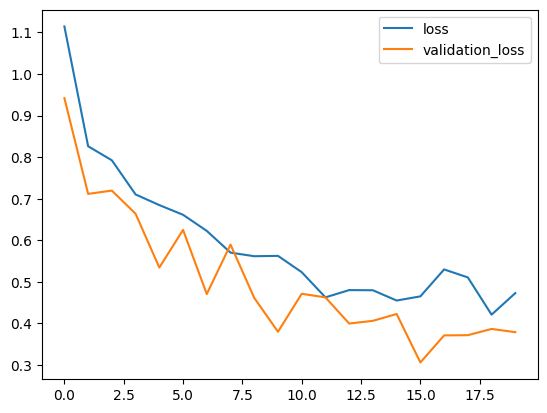

In [ ]:
#Plotting loss per iteration

plt.plot(model_history.history['loss'],label='loss')
plt.plot(model_history.history['val_loss'], label = 'validation_loss')
plt.legend()

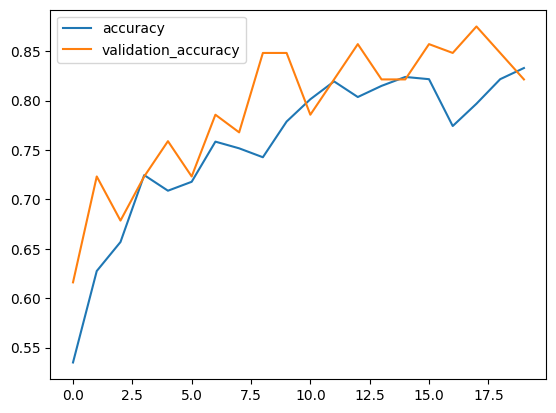

In [ ]:
#Plotting accuracy per iteration

plt.plot(model_history.history['accuracy'],label='accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'validation_accuracy')
plt.legend()

In [ ]:
## Evaluating our model

print(model.evaluate(validation_gen))

4/4 [==============================] - 1s 180ms/step - loss: 0.3656 - accuracy: 0.8661
[0.36564040184020996, 0.8660714030265808]


## **Testing and predicting custom images**

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image

In [ ]:
plt.figure(figsize=(10, 10))

uploaded=files.upload()


Saving filopodiaimage037.png to filopodiaimage037.png


<Figure size 1000x1000 with 0 Axes>

The shape is (250, 250, 1)
1/1 [==============================] - 0s 74ms/step
The uploaded image of spine belongs to the class FILOPODIA


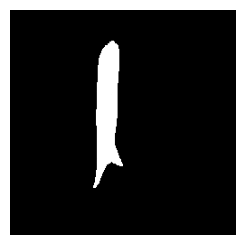

In [ ]:
i=1

for fn in uploaded.keys():

  # predicting images

  path='/content/gdrive/MyDrive/Colab Notebooks/Spine_Dataset/' + fn
  img=tf.keras.utils.load_img(path, color_mode='grayscale',target_size=(250, 250))

  plt.subplot(1,2,i)

  plt.imshow(img,cmap='gray',label=fn)
  plt.axis('off')

  i+=1

  x=image.img_to_array(img)
  print(f"The shape is {x.shape}")
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images,batch_size=16)
  #print(classes)

values = classes[0].tolist()
ind = values.index(max(values)) + 1
if(ind==1):
  print('The uploaded image of spine belongs to the class FILOPODIA')
elif(ind==2):
  print('The uploaded image of spine belongs to the class MUSHROOM')
elif(ind==3):
  print('The uploaded image of spine belongs to the class STUBBY')
elif(ind==4):
  print('The uploaded image of spine belongs to the class THIN')

In [ ]:
model.save(filepath="/content/gdrive/MyDrive/Colab Notebooks/Spine_Dataset/Spine_Categorizer.keras", overwrite=True, save_format="keras")
print('Model Saved')

Model Saved
